In [1]:
from lxml import etree
import matplotlib.pyplot as plt
from astropy.time import Time
import pandas as pd
import numpy as np

In [2]:
fname = '/Users/vkostov/Documents/GitHub/pandora-scheduler/src/pandorascheduler/data/calendar_top20_4weeks_start_2025_09_03.xml'
parser = etree.XMLParser(load_dtd=True, no_network=False)
tree = etree.parse(fname, parser)
root = tree.getroot()
df = pd.DataFrame(columns=['visitid', 'seqid', 'target', 'start', 'stop'])
idx = 0
for visit in root[1:]:
    visitid = visit[0].text
    for seq in visit[1:]:
        seqid = seq[0].text
        target = seq[1][0].text
        df.loc[idx] = [visitid, seqid, target, Time(seq[1][2][0].text).jd, Time(seq[1][2][1].text).jd]
        idx += 1
df = df.set_index('target')

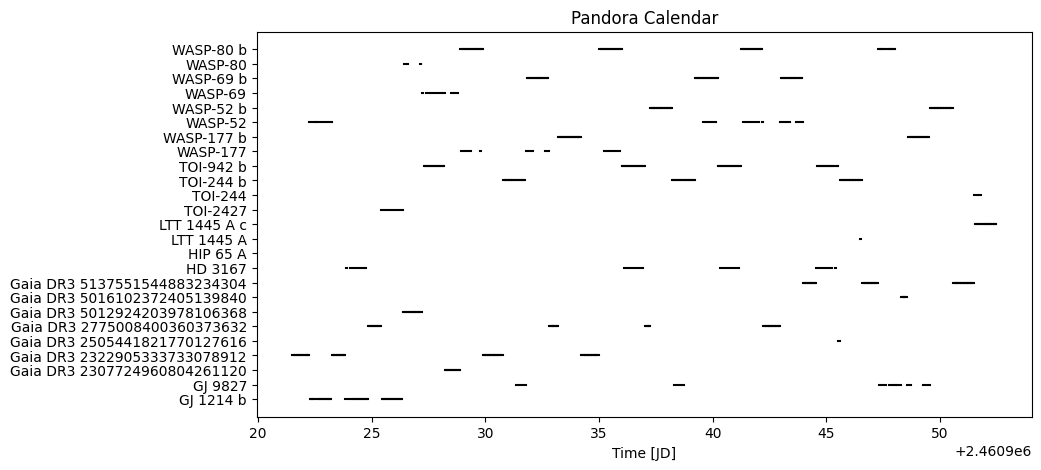

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
targs = np.unique(np.asarray(df.index))
for idx, targ in enumerate(targs):
    z = np.asarray([df.loc[targ].start, df.loc[targ].stop]).T
    ax.plot(z.T, z.T**0 * idx, c='k')
ax.set(xlabel='Time [JD]', yticks=np.arange(0, len(targs)), yticklabels=targs, title='Pandora Calendar');